In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the data from the CSV file
file_path = '/content/sample_data/House Price India.csv'
data = pd.read_csv(file_path)

In [4]:
# Select the relevant columns
data = data[['living area', 'number of bedrooms', 'number of bathrooms', 'Price']]

In [5]:
# Check for and handle any missing values
data = data.dropna()

In [6]:
# Define features (X) and target (y)
X = data[['living area', 'number of bedrooms', 'number of bathrooms']]
y = data['Price']

In [7]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) score:", r2)

Mean Squared Error (MSE): 65977850281.92112
R-squared (R²) score: 0.5318028545693374


In [12]:
# Sample a subset of the data for visualization
sample_size = 100  # Adjust the sample size as needed
sample_indices = y_test.sample(n=sample_size, random_state=42).index
y_test_sample = y_test.loc[sample_indices]
y_pred_sample = pd.Series(y_pred, index=y_test.index).loc[sample_indices]

In [13]:

# Plotting the results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Prices')

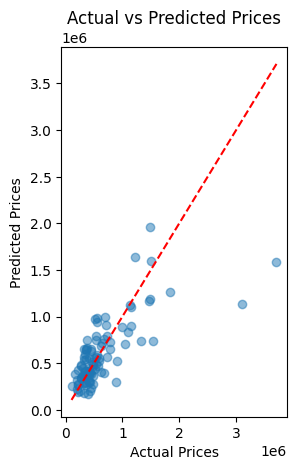

In [14]:
# Scatter plot of actual vs predicted prices
plt.subplot(1, 2, 1)
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

Text(0.5, 1.0, 'Residuals vs Predicted Prices')

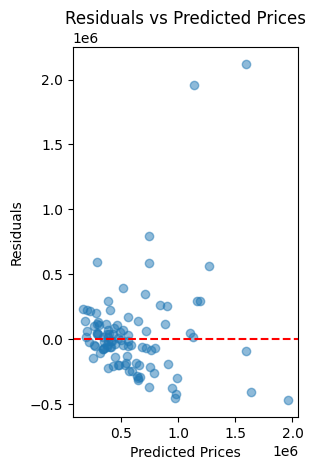

In [15]:
# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test_sample - y_pred_sample
plt.scatter(y_pred_sample, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>